<a href="https://colab.research.google.com/github/Aryaman2912/ML/blob/master/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

In [10]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [27]:
# X is the set of images and y is the set of labels
X,y = mnist["data"],mnist['target']
y = y.astype(np.uint8)             # Convert y from string to int 
print(X.shape,'\n',y.shape)

(70000, 784) 
 (70000,)


5

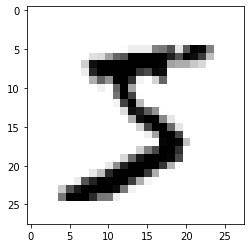

In [28]:
# Display an image

digit = X[0]
digit_pic = digit.reshape(28,28)
plt.imshow(digit_pic,cmap = mpl.cm.binary,interpolation="nearest") 
y[0]

In [29]:
# Train test split

X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [33]:
# Binary classifier to classify each image as 5 or not 5
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

y_train_5 = (y_train==5)
y_test_5 = (y_test==5)
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
print(sgd_clf.predict([digit]))

# Cross validation
skfolds = StratifiedKFold(n_splits=3,random_state=42)

for train_index,test_index in skfolds.split(X_train,y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds,y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct/len(y_pred))




[ True]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.95035
0.96035
0.9604
